TRABALHANDO COM EXCEL

In [3]:
#IMPORTANDO A BIBLIOTECA 

import pandas as pd

In [5]:
#Criando os DataFrames

df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [6]:
#Unindos os DataFrames

df = pd.concat([df1,df2,df3,df4,df5])

In [7]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [8]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [9]:
#Tipos das dados

df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [10]:
#para saber valores nulos

df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [11]:
#Criando uma coluna com a receita

df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [12]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [13]:
df["Receita"].max() #Qual a maior receita

3544.0

In [14]:
df["Receita"].min() #Qual a menor receita

3.34

In [15]:
df.nlargest(3, "Receita") #Top 3 maiores receitas

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [16]:
df.nsmallest(3, "Receita") #3 Menores receitas

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [17]:
df.groupby("Cidade")["Receita"].sum() #Total de receita por cidade

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

TRABALHANDO COM DATAS

In [18]:
#Receita total por ano

df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [19]:
#Criando coluna com o ano da venda

df["Ano Venda"] = df["Data"].dt.year

In [20]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano Venda
172,Natal,2019-01-02,6.70,1035,1,6.70,2019
132,Fortaleza,2019-03-02,17.49,983,5,87.45,2019
87,Fortaleza,2019-01-01,42.04,1002,5,210.20,2019
106,Fortaleza,2019-01-01,28.42,1002,3,85.26,2019
40,Fortaleza,2019-02-13,19.13,1002,4,76.52,2019


In [21]:
#Criando coluna com o mês e dia da venda

df["Mês Venda"], df["Dia Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [22]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano Venda,Mês Venda,Dia Venda
35,Fortaleza,2019-01-01,133.97,1005,2,267.94,2019,1,1
16,Aracaju,2018-01-01,37.68,1522,10,376.80,2018,1,1
117,Recife,2019-03-02,15.42,983,8,123.36,2019,3,2
172,Salvador,2019-01-02,6.70,1035,1,6.70,2019,1,2
3,Fortaleza,2019-02-10,20.95,1004,6,125.70,2019,2,10


In [23]:
df["Data"].min() #menor data de venda

Timestamp('2018-01-01 00:00:00')

In [24]:
#Criando coluna com o trimestre da venda

df["Trimestre Venda"] = df["Data"].dt.quarter

In [25]:
df.sample(5) #amostra

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano Venda,Mês Venda,Dia Venda,Trimestre Venda
1,Recife,2019-01-01,11.44,983,1,11.44,2019,1,1,1
77,Recife,2019-01-01,102.82,981,6,616.92,2019,1,1,1
17,Natal,2018-02-18,276.00,854,3,828.00,2018,2,18,1
84,Aracaju,2018-01-01,40.98,1520,5,204.90,2018,1,1,1
89,Aracaju,2018-01-01,10.15,1523,7,71.05,2018,1,1,1


In [28]:
#Criando um DataFrame com as vendas de março de 2019.

venda_marco_19 = df.loc[(df["Ano Venda"] == 2019) & (df["Mês Venda"] == 3)]

In [29]:
venda_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano Venda,Mês Venda,Dia Venda,Trimestre Venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,1
...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,1


In [30]:
#Quantas vendas cada loja realizou

df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

GRÁFICOS

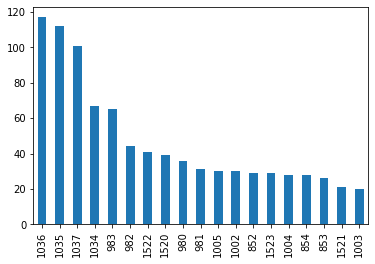

In [31]:
#Gráficos de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

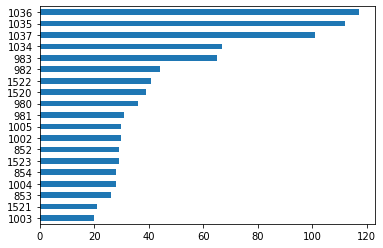

In [32]:
#Gráficos de barras horizontal

df["LojaID"].value_counts(ascending=True).plot.barh();

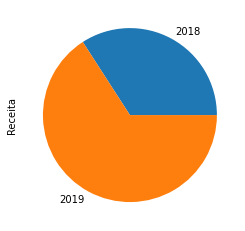

In [33]:
#Gráfico de Pizza

df.groupby(df["Ano Venda"])["Receita"].sum().plot.pie();

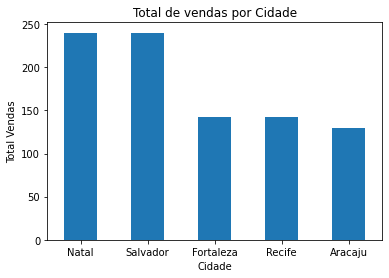

In [34]:
#TOtal de venda por cidade personalizado

import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title = "Total de vendas por Cidade");
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")
plt.xticks(rotation="horizontal");

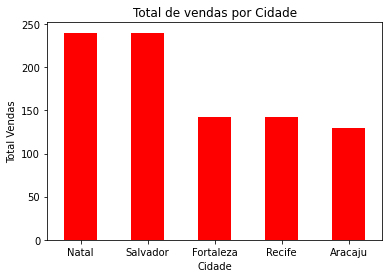

In [35]:
#mudando a cor do gráfico

df["Cidade"].value_counts().plot.bar(title = "Total de vendas por Cidade", color = "red");
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")
plt.xticks(rotation="horizontal");

In [36]:
#Alterando o stilo

plt.style.use("ggplot")

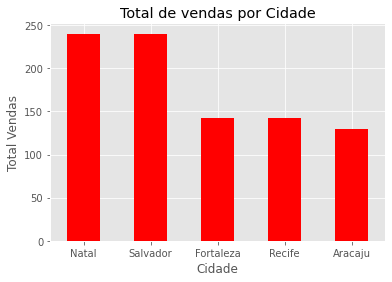

In [37]:
df["Cidade"].value_counts().plot.bar(title = "Total de vendas por Cidade", color = "red");
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")
plt.xticks(rotation="horizontal");

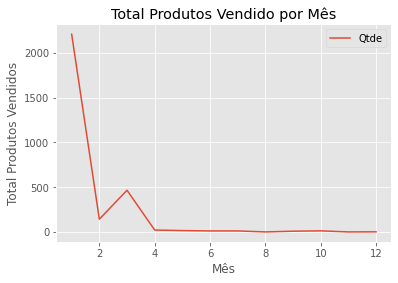

In [38]:
#Gráfico de Linha do Total vendeido por Mês

df.groupby(df["Mês Venda"])["Qtde"].sum().plot(title = "Total Produtos Vendido por Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [39]:
df_2019 = df[df["Ano Venda"] == 2019]

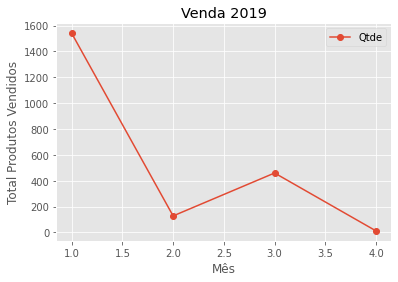

In [40]:
#Total das vendas de 2019

df_2019.groupby(df_2019["Mês Venda"])["Qtde"].sum().plot(marker = "o", title = "Venda 2019")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

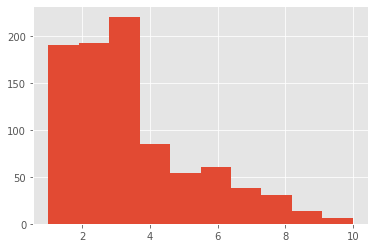

In [41]:
#histograma

plt.hist(df["Qtde"]);

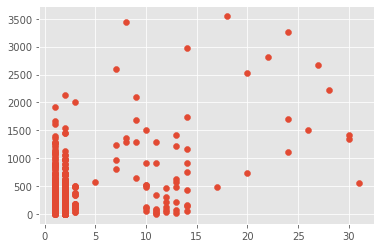

In [43]:
#dispersão

plt.scatter(x=df_2019["Dia Venda"], y = df_2019["Receita"]);